
### Name: Priyanka Moorthy
### SJSU ID: 015936583
-------------------------------------

### Results:
#### Feed count: 785
#### Diaper change count: 888
#### Most Action By Day:
    Day       Thur
    Hour        20
    Action      22
-------------------------------------------

In [148]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

### Goal
The goal is to answer the following questions:
    1. How many total feeds are there?
    2. How many total diaper changes?
    3. What day had the most actions in a given hour (diaper changes + feeds)?
and perform the following on data baby.txt:
    1. For all of the days create a histogram to show what hour of the day had the most actions.
    2. Graph the number of diaper changes per day over time   
    
### Brief understanding of data:

1. The data has a set of lines that contain the time, a action(eat, poop, pee or poop and pee). The actios are sometimes followed by the quantity of intake if the action was eat and the number of times the actions pee, poop or poop and pee happen. In few cases "a little" is used to describe the quantity instead of the number. Let's call these set of rows as action rows.
2. A date is follwed after a set of action rows which indicates on which date the above actions took place. The format of date is also incosistant.

### Data format proposal:

|Date|Month|Day| Time| Action|Quantity|Unit|
|:---|:----|:--|:----|:------|:-------|:---|
|21|07|Tue|1253|eat|3|oz|
|21|07|Tue|1248|pee|||

For now lets Ignore the Quantity and Unit columns as they are not required to reach our goal.


Date - The Date the action took place
Time - The time the action took place
Action - Action could be either eat, poop, pee, poop or pee, poop and pee
Quantity - If the action is `eat`, this will hold the quantity of food intake. In case of other action types it will hold the number of times the action took place, if indicated in baby.txt file.
Unit - The unit of Quatity if the action was `eat`

### Import libraries

In [149]:
#import data from baby.txt file
import re
import pandas as pd
import copy
from matplotlib import pyplot
import seaborn as sns


### Global Variables

In [150]:
#global variables
count = 0
month_fullname = {
    "January":1,
    "February":2,
    "March":3,
    "April": 4,
    "May": 5,
    "June":6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
    }

month_shrt = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr": 4,
    "May": 5,
    "Jun":6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12 
    }
    

### Load Data:

Loads data from baby.txt file

In [151]:
def load_data():
    baby_list = open("./baby.txt").read().splitlines()
    baby_list = list(filter(None, baby_list))
    return baby_list
    

### Total Feeds:
Return total number of feeds in data

In [152]:
### get totalfeeds 
def totalfeeds(dataframe):
    return len(dataframe.loc[(dataframe['Action'] == 'eat') | (dataframe['Action'] == 'snack')])

### Total Diaper Change:
Return total number of diaper change in data

In [153]:
### get totalDiaperChange 
def totalDiaperChange(dataframe):
    return len(dataframe.loc[(dataframe['Action'] != 'eat') & (dataframe['Action'] != 'snack')])

### Populate Dict with data:
- Populate the dict with Date, Day, Month, Hour, Minute and Action for each row in data associated with a date
- Values O500 and 20050 of time are changed to 0500 and 2050 respectively
- Value 'est' is replaced with eat

In [154]:
def populateDict(date_dict, values):
    rows = []
    temp_values = copy.deepcopy(values)
    for val in temp_values:
        row = {}
        val_lst = val.split()
        val_lst[0] = int('0500') if  val_lst[0]== 'O500' else int('2050') if val_lst[0] == '20050' else val_lst[0]
        row['Minute']= int(val_lst[0])%100
        row['Hour']= int(int(val_lst[0])/100)
        row['Action']= 'eat' if val_lst[1]=='est' else val_lst[1]
        row['Date'] = int(date_dict['Date'])
        row['Day'] = date_dict['Day']
        row['Month'] = int(date_dict['Month'])
        rows.append(row)
    return rows
        

### Clean Data:
- for each format of date, a regex is used to match and fetch the values
- Each action type is added to temp_list until we come across date. If date occurs the values in temp_list along with date is used to construct res dict
- res_list dict is later converted to a dataframe

In [155]:
def cleanData(b_list):
    baby_dict = []
    temp_list = []
    res_list = []
    for val in b_list:
        # match format 'Tue July 21'
        date_match_1 = re.findall(r'(?:Mon|Tue|Wed|Thur|Fri|Sat|Sun)\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{1,2}', val)
        # match format 'Sat 05/30'
        date_match_2 = re.findall(r'(?:Mon|Tue|Wed|Thur|Fri|Sat|Sun)\s\d{1,2}/\d{1,2}', val)
        # match format '5/25 Mon'
        date_match_3 = re.findall(r'\d{1,2}/\d{1,2}\s(?:Mon|Tue|Wed|Thur|Fri|Sat|Sun)', val)
        # match format 'Tues 05/30'
        date_match_4 = re.findall(r'(?:Mon|Tues|Wed|Thurs|Fri|Sat|Sun)\s\d{1,2}/\d{1,2}', val)
        # match format 'Tues Jun 30'
        date_match_5 = re.findall(r'(?:Mon|Tues|Wed|Thurs|Fri|Sat|Sun)\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{1,2}', val)
        # match format 'Tues June 30'
        date_match_6 = re.findall(r'(?:Mon|Tues|Wed|Thurs|Fri|Sat|Sun)\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{1,2}', val)

        if(len(date_match_1)!=0): 
            date = val.split()
            temp_dict = {
                'Day': 'Tue' if date[0]=="Tues" else 'Thur' if date[0]=="Thurs" else date[0],
                'Month': month_fullname[date[1]],
                'Date': 15 if int(date[2])==155 else date[2]
            }
            res_list.extend(populateDict(temp_dict,temp_list))
            temp_list.clear()
        elif len(date_match_2)!=0:
            date = val.split()
            dd_mm = date[1].split('/')
            temp_dict = {
                'Day': date[0],
                'Date': dd_mm[1],
                'Month': dd_mm[0]
            }
            res_list.extend(populateDict(temp_dict,temp_list))
            temp_list.clear()
            date_match_1.clear()
            date_match_2.clear()
            date_match_3.clear()
        elif len(date_match_3)!=0:
            date = val.split()
            dd_mm = date[0].split('/')
            temp_dict = {
                'Day': date[1],
                'Date': dd_mm[1],
                'Month': dd_mm[0]
            }
            res_list.extend(populateDict(temp_dict,temp_list))
            temp_list.clear()
            date_match_1.clear()
            date_match_2.clear()
            date_match_3.clear()
        elif(len(date_match_4)!=0):
            date = val.split()
            dd_mm = date[1].split('/')
            temp_dict = {
                'Day': 'Tue' if date[0]=="Tues" else 'Thur' if date[0]=="Thurs" else date[0],
                'Date': dd_mm[1],
                'Month': dd_mm[0] 
            }
            res_list.extend(populateDict(temp_dict,temp_list))
            temp_list.clear()
            date_match_1.clear()
            date_match_2.clear()
            date_match_3.clear() 
        elif(len(date_match_5)!=0):
            date = val.split()
            temp_dict = {
                'Day': 'Tue' if date[0]=="Tues" else 'Thur' if date[0]=="Thurs" else date[0],
                'Month': month_shrt[date[1]],
                'Date': date[2]
            }
            res_list.extend(populateDict(temp_dict,temp_list))
            temp_list.clear() 
        elif(len(date_match_6)!=0):
            date = val.split()
            temp_dict = {
                'Day': 'Tue' if date[0]=="Tues" else 'Thur' if date[0]=="Thurs" else date[0],
                'Month': month_fullname[date[1]],
                'Date': date[2]
            }
            res_list.extend(populateDict(temp_dict,temp_list))
            temp_list.clear()
        elif(len(re.findall(r'\d{3,4}', val)) != 0):
            temp_list.append(val)
            
        else:
            print("other value format->", val)
    return res_list



### Fix Values with same date, month but different Day
- As few data have same date and month but different Day, it needs to be handled
#### Approach A:
- Replace the day of the week with the value that makes most sense with continuation considering all the data is from same year
#### Approach B:
- Change all the date values down the line for values that have same date and month but differnt Day considering them to be induvidual day

As its uncertain, if the data is from same year or different. I implemented the Approach A.
    

In [156]:
# for days with same date and month but different week day, update day to the last day
def fixSameDateDiffDay(df):
    df_mdd = df.groupby(['Month', 'Date'])['Day'].transform('last')
    df_modified = df
    df_modified['Day'] = df_mdd
    day_of_week = ['Sun', 'Sat','Fri','Thur','Wed','Tue','Mon']
    print(df_modified)
    df_mdd = df_mdd.reset_index()
    return df_modified

#### Group data by Day and Hour while aggregating the count of actions, sort and drop duplicates if any

In [157]:
def groupByAndSort(dataframe):
    maximums = dataframe.groupby(['Day','Hour'])['Action'].agg('size')
    maximums=maximums.reset_index()
    df_sorted = maximums.sort_values('Action', ascending=False).drop_duplicates(['Day','Hour'])
    return maximums,df_sorted
    

#### From the sorted data, get the Date, Month, Day with max Action count

In [159]:
def getMostActionsDay(df_sorted):
    #q3
    return df_sorted.loc[df_sorted['Action'].idxmax()]

In [160]:
def plotMostActionsByHour(df_sorted):
    #q4
    fig, ax = pyplot.subplots()
    for hour, group in df_sorted.groupby("Day"):
        ax.hist(group['Action'], label=f" {hour}")
    ax.legend()
    pyplot.show()

In [161]:
def plotMostActionsByHourClubed(maximums):
    df_grpd = maximums
    print(df_grpd)
    df_grpd['Action'].hist(by=df_grpd['Day'])

In [162]:
def plotDiaperChangeOverTime_Day(df):
    #q5
    fig, ax = pyplot.subplots()
    diaper_overtime = df.loc[(df['Action'] != 'eat') & (df['Action'] != 'snack')]
    diaper_overtime_day = diaper_overtime.groupby(['Day'])['Action'].agg('size')
    print(diaper_overtime_day)
    diaper_overtime_day.plot(legend='True', label=f"Day")
    pyplot.show()

In [163]:
def plotDiaperChangeOverTime_Date(df):
    #q5
    fig, ax = pyplot.subplots()
    diaper_overtime = df.loc[(df['Action'] != 'eat') & (df['Action'] != 'snack')]
    diaper_overtime_date = diaper_overtime.groupby(['Date','Month'])['Action'].agg('size')
    print(diaper_overtime_date)
    diaper_overtime_date.plot(legend='True',label=f"Date")
    pyplot.show()

In [166]:
def otherPlots(df, df_sorted):
    #Day, Hour across data
    fig, ax = pyplot.subplots()
    grouped_dmh = df.groupby(['Day','Hour'])['Action'].agg('size')
    grouped_dmh.plot(legend='True')
    pyplot.show()
    
    #Day, Hour across data
    df_sorted_plt = df_sorted.groupby('Day').first().reset_index()
    print(df_sorted_plt)

    #For each day of the week, plot against hour and action
    sns.barplot(x="Day", y="Hour", hue="Action",data=df_sorted_plt)
    pyplot.show()


i was here
other value format-> Baby feeds
other value format-> 20 pee
other value format-> Hydrocortisone started at 1:30am
other value format-> -
other value format-> —
other value format-> pee
other value format-> hairloss
      Minute  Hour Action  Date  Day  Month
1654       0     0   poop    24  Fri      4
1655      35     1    pee    24  Fri      4
1656       0     2    eat    24  Fri      4
1657      20     5    eat    24  Fri      4
1658      45     5   poop    24  Fri      4
...      ...   ...    ...   ...  ...    ...
4          7    11    pee    21  Tue      7
3         20    11   poop    21  Tue      7
2         35    11    pee    21  Tue      7
1         48    12    pee    21  Tue      7
0         53    12    eat    21  Tue      7

[1673 rows x 6 columns]
Feed count 785
diaper change count 888
Most Action By Day
Day       Thur
Hour        20
Action      22
Name: 116, dtype: object


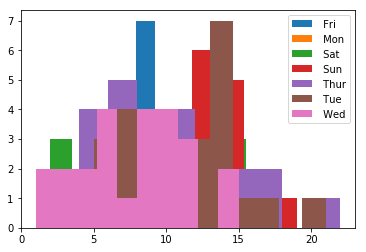

     Day  Hour  Action
0    Fri     0      10
1    Fri     1       9
2    Fri     2       5
3    Fri     3       4
4    Fri     4       4
..   ...   ...     ...
163  Wed    19      10
164  Wed    20      11
165  Wed    21      10
166  Wed    22       3
167  Wed    23       5

[168 rows x 3 columns]
Day
Fri     132
Mon     125
Sat     117
Sun     140
Thur    126
Tue     146
Wed     102
Name: Action, dtype: int64


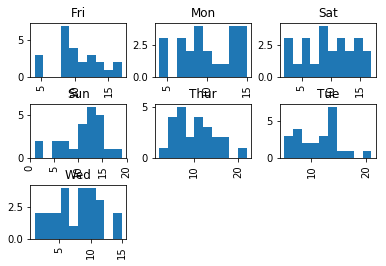

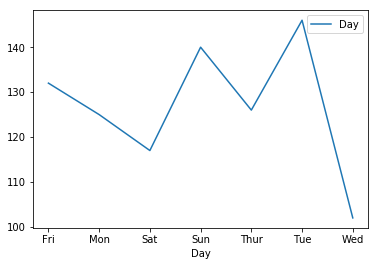

Date  Month
1     5        10
      6        10
2     5        10
      6        11
      7        22
               ..
29    5        11
      6         8
30    5         9
      6        10
31    5        10
Name: Action, Length: 85, dtype: int64


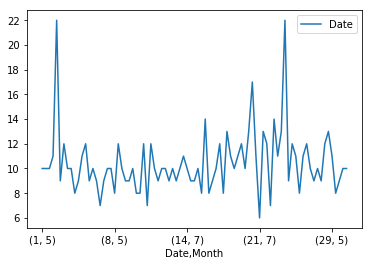

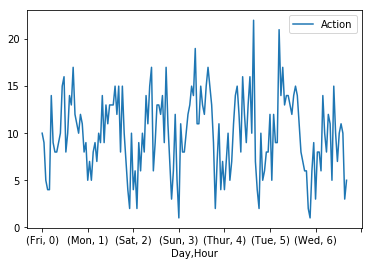

    Day  Hour  Action
0   Fri    17      17
1   Mon    20      15
2   Sat    12      17
3   Sun    12      19
4  Thur    20      22
5   Tue    10      21
6   Wed    16      15


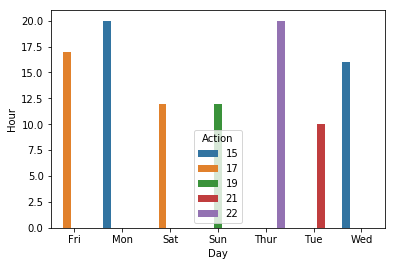

In [167]:
### main function
def main():
    baby_list = load_data()
   
    res = cleanData(baby_list)
    
    #format dataframe and sort
    df = pd.DataFrame(res)

    #update weekdays to be ordered categorical 
    weekday_cat = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    df['Day'] = pd.Categorical(df['Day'], categories=weekday_cat, ordered=True)
    #sort values on date and time
    df = df.sort_values(['Month', 'Date','Day', 'Hour','Minute'])
    
    df = fixSameDateDiffDay(df)
    
    #q1,2
    print("Feed count", totalfeeds(df))
    print("diaper change count", totalDiaperChange(df))
    
    maximums,df_sorted = groupByAndSort(df)
    
    #q3
    most_actions_day = getMostActionsDay(df_sorted)
    print("Most Action By Day")
    print(most_actions_day)
    
    
    #q4
   
    plotMostActionsByHour(df_sorted)
    plotMostActionsByHourClubed(maximums)
    
 
    
    #q5
    plotDiaperChangeOverTime_Day(df)
    plotDiaperChangeOverTime_Date(df)
    

    
    otherPlots(df,df_sorted)
    
    
    
if __name__ == "__main__":
        main()

In [ ]:
# a = re.findall(r'(?:Mon|Tue|Wed|Thur|Fri|Sat|Sun)\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d\d', 'Tue July 21')
# b = re.findall(r'(?:Mon|Tue|Wed|Thur|Fri|Sat|Sun)\s\d{1,2}/\d{1,2}', 'Sat 05/30')
# c = b = re.findall(r'\d{1,2}/\d{1,2}\s(?:Mon|Tue|Wed|Thur|Fri|Sat|Sun)', '5/25 Mon')
# print(a,b,c)
# re.findall(r'\d\d\d\d', '1050 pee')

In [133]:
# funtion to return dict with date as key and list of data having same date as values
# def getDataOfSameDate(b_list, count):
#     baby_dict = []
#     temp_list = [] 
#     for val in b_list:
#         date_match_1 = re.findall(r'(?:Mon|Tue|Wed|Thur|Fri|Sat|Sun)\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d\d', val)
#         date_match_2 = re.findall(r'(?:Mon|Tue|Wed|Thur|Fri|Sat|Sun)\s\d{1,2}/\d{1,2}', val)
#         date_match_3 = re.findall(r'\d{1,2}/\d{1,2}\s(?:Mon|Tue|Wed|Thur|Fri|Sat|Sun)', val)
#         date_match_4 = re.findall(r'(?:Mon|Tues|Wed|Thurs|Fri|Sat|Sun)\s\d{1,2}/\d{1,2}', val)
#         date_match_5 = re.findall(r'(?:Mon|Tues|Wed|Thurs|Fri|Sat|Sun)\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{1,2}', val)
#         date_match_6 = re.findall(r'(?:Mon|Tues|Wed|Thurs|Fri|Sat|Sun)\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{1,2}', val)
#         if(len(date_match_1)!=0 or len(date_match_2)!=0 or len(date_match_3)!=0 or len(date_match_4)!=0 or len(date_match_5)!=0 or len(date_match_6)!=0):
#             re_match = date_match_1 if len(date_match_1)!=0 else date_match_2 if len(date_match_2)!=0 else date_match_3 if len(date_match_3)!=0 else date_match_4 if len(date_match_4)!=0 else date_match_5 if len(date_match_5)!=0 else date_match_6
#             val_dict = {
#                 re_match[0]: copy.deepcopy(temp_list)
#             }
#             baby_dict.append(val_dict)
#             temp_list.clear()
#             re_match.clear()
#             date_match_1.clear()
#             date_match_2.clear()
#             date_match_3.clear()
#             date_match_4.clear()
#             date_match_5.clear()
#             date_match_6.clear()
#             val_dict = {}
#         elif(len(re.findall(r'\d{3,4}', val)) != 0):
#             temp_list.append(val)
#             count = count+1
#     return (baby_dict, count)

# res_dict, count = getDataOfSameDate(baby_list, count)
# print(len(res_dict), count)
             
            